In [306]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1'

In [307]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [308]:
# 80% train, 20% test
train_test_split = int(0.8 * len(X))
X_train, y_train = X[:train_test_split], y[:train_test_split]
X_test, y_test = X[train_test_split:], y[train_test_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [309]:
# plot
def plot_predictions(training_data=X_train, 
                     training_label=y_train, 
                     testing_data=X_test, 
                     testing_label=y_test, 
                     predictions=None):
    plt.scatter(training_data, training_label, c="b", s=4, label="Training Data")
    plt.scatter(testing_data, testing_label, c="g", s=4, label="Testing Data")
    if predictions is not None:
        plt.scatter(testing_data, predictions, c="g", s=4, label="Testing Data")

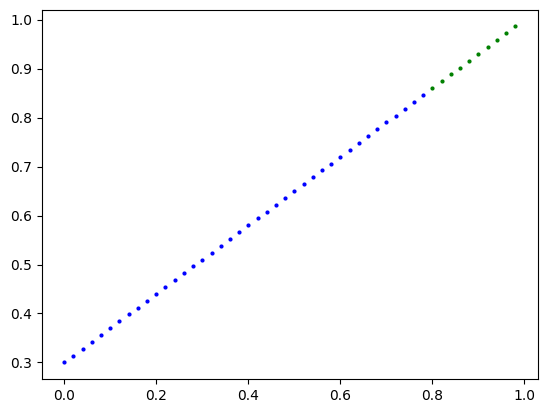

In [310]:
plot_predictions()

In [311]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)
    def forward(self, X):
        return self.weights * X + self.bias

In [312]:
torch.manual_seed(42)

model = LinearRegressionModel()
model.parameters()

<generator object Module.parameters at 0x11fb33f90>

In [313]:
list(model.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [314]:
model.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [315]:
with torch.inference_mode():
    y_preds = model(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

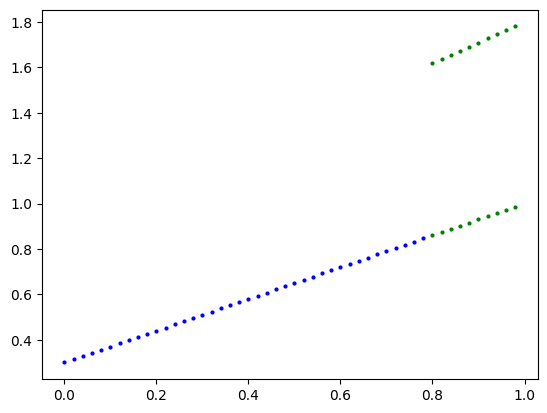

In [316]:
plot_predictions(predictions=y_preds)

In [317]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [318]:
# 1. model create
# 2. do forward pass
# 3. calculate loss
# 4. optimizer zero_grad (zero gradients)
# 5. backward pass ()
# 6. optimizer step step step (gradient desent)

# 7. put model in eval mode
# 8. use torch.inference_mode and predict in test data
# 9. calculate loss for overfitting

training_loss_values = []
testing_loss_values = []
epoch_count = []
epochs = 100

for epoch in range(epochs):
    #train
    model.train()
    y_pred_train = model(X_train)
    loss_train = loss_fn(y_pred_train, y_train)
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    
    # test
    model.eval()
    with torch.inference_mode():
        y_pred_test = model(X_test)
    test_loss = loss_fn(y_pred_test, y_test)


    epoch_count.append(epoch)
    training_loss_values.append(loss_train.detach().numpy())
    testing_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch} | MAE Train Loss: {loss_train} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.6860889196395874 | MAE Test Loss: 0.7637526988983154 
Epoch: 1 | MAE Train Loss: 0.6745679378509521 | MAE Test Loss: 0.7502816915512085 
Epoch: 2 | MAE Train Loss: 0.6630470156669617 | MAE Test Loss: 0.7368106245994568 
Epoch: 3 | MAE Train Loss: 0.6515260338783264 | MAE Test Loss: 0.7233396768569946 
Epoch: 4 | MAE Train Loss: 0.6400049924850464 | MAE Test Loss: 0.7098686695098877 
Epoch: 5 | MAE Train Loss: 0.6284840703010559 | MAE Test Loss: 0.6963977217674255 
Epoch: 6 | MAE Train Loss: 0.6169630289077759 | MAE Test Loss: 0.6829267144203186 
Epoch: 7 | MAE Train Loss: 0.6054420471191406 | MAE Test Loss: 0.6694557666778564 
Epoch: 8 | MAE Train Loss: 0.5939210653305054 | MAE Test Loss: 0.6559847593307495 
Epoch: 9 | MAE Train Loss: 0.5824000239372253 | MAE Test Loss: 0.6425138115882874 
Epoch: 10 | MAE Train Loss: 0.5708791017532349 | MAE Test Loss: 0.6290428042411804 
Epoch: 11 | MAE Train Loss: 0.5593580603599548 | MAE Test Loss: 0.6155718564987183 
Ep

In [319]:
len(training_loss_values), len(testing_loss_values)

(100, 100)

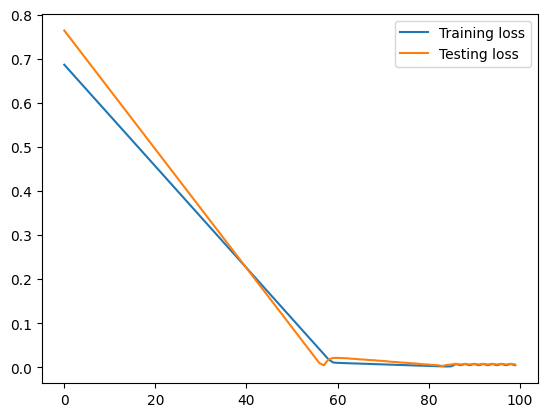

In [320]:

plt.plot(epoch_count, training_loss_values, label="Training loss")
plt.plot(epoch_count, testing_loss_values, label="Testing loss")
plt.legend()


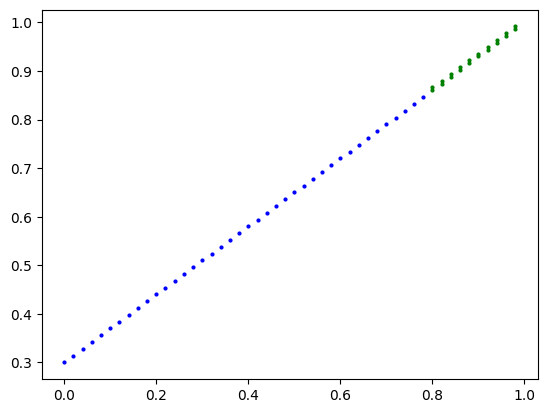

In [321]:
with torch.inference_mode():
    y_preds = model(X_test)
plot_predictions(predictions=y_preds)

In [322]:
list(model.parameters())

[Parameter containing:
 tensor([0.6977], requires_grad=True),
 Parameter containing:
 tensor([0.3080], requires_grad=True)]

In [323]:
model.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])